# 1. Install and Import Dependencies

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13599, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 13599 (delta 87), reused 102 (delta 71), pack-reused 13476
Receiving objects: 100% (13599/13599), 12.15 MiB | 25.03 MiB/s, done.
Resolving deltas: 100% (9487/9487), done.


In [ ]:
%cd yolov5
!pip install -qr requirements.txt

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [ ]:
img = '/content/drive/MyDrive/delhi_traffic_pti_1200x768.webp'

In [ ]:
results = model(img)
results.print()

image 1/1: 433x770 6 persons, 22 cars, 3 motorcycles, 10 buss, 8 trucks
Speed: 209.6ms pre-process, 81.1ms inference, 50.3ms NMS per image at shape (1, 3, 384, 640)


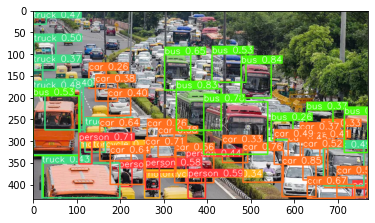

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()



[array([[[ 61, 219, 134],
         [ 61, 219, 134],
         [ 61, 219, 134],
         ...,
         [ 26,  35,  35],
         [ 16,  27,  16],
         [ 18,  30,  14]],
 
        [[ 61, 219, 134],
         [ 61, 219, 134],
         [ 61, 219, 134],
         ...,
         [ 22,  31,  30],
         [ 23,  33,  25],
         [ 23,  34,  21]],
 
        [[ 61, 219, 134],
         [ 61, 219, 134],
         [ 61, 219, 134],
         ...,
         [ 15,  24,  23],
         [ 18,  28,  22],
         [ 18,  28,  20]],
 
        ...,
 
        [[124, 121, 126],
         [125, 122, 127],
         [127, 124, 130],
         ...,
         [195,  86,  59],
         [164,  95, 114],
         [185, 121, 138]],
 
        [[124, 121, 126],
         [125, 122, 127],
         [127, 124, 130],
         ...,
         [116,  35,  58],
         [125,  46,  68],
         [147,  70,  91]],
 
        [[123, 119, 125],
         [124, 121, 126],
         [127, 124, 130],
         ...,
         [114,  36,  58],
  

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(2)
while cap.isOpened():
  ret, frame = cap.read()

  #make detection

  results = model(frame)

  cv2.imshow('YOLO', np.squeeze(results.render()))

  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

In [ ]:
%cd /content/drive/MyDrive/drowsy_awake_yolo/yolov5

/content/drive/MyDrive/drowsy_awake_yolo/yolov5


# 5. Train from scratch

In [ ]:
import uuid
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
#loop through labels
for label in labels:
  print("collecting images for {}".format(label))
  time.sleep(5)

  #loop through image range
  for img_num in range(number_imgs):
    print('Collecting images for {}, image number {}'.format(label, img_num))

    #webcam feed
    ret, frame = cap.read()

    #naming out image path
    imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

    #write out img to file
    cv2.imwrite(imgname, frame)

    #render to the screen
    cv2.imshow("IMage Collection", frame)

    # 2 second delay between captures
    time.sleep(2)

    if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
conda install pyqt=5
conda install -c anaconda lxml
pyrcc5 -o libs/resources.py resources.qrc
# python labelImg.py


In [ ]:
!python train.py --img 320 --batch 16 --epochs 500 --data '/content/drive/MyDrive/drowsy_awake_yolo/yolov5/dataset.yml' --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/drowsy_awake_yolo/yolov5/dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-204-gf43cd53 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamm

# 6. Load Custom Model


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/drowsy_awake_yolo/yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-20 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
img = '/content/drive/MyDrive/drowsy_awake_yolo/data/images/awake.3e641edf-d766-11ec-8efa-ec2e98e4c3a8.jpg'

In [ ]:
results = model(img)

In [ ]:
results.print()

image 1/1: 480x640 1 awake
Speed: 26.2ms pre-process, 51.0ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)


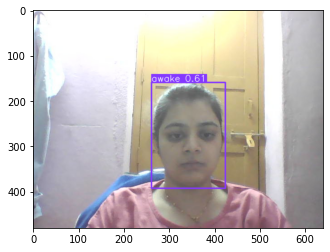

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

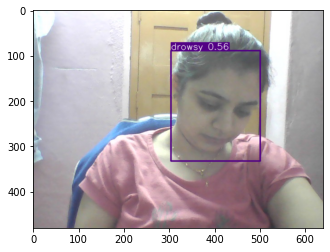

In [ ]:
img2 = '/content/drive/MyDrive/drowsy_awake_yolo/data/images/drowsy.673fb2a4-d766-11ec-bcd2-ec2e98e4c3a8.jpg'
results = model(img2)
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2_imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()